In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [12]:
control = df[df["test group"] == "psa"]
test = df[df["test group"] == "ad"]

control.shape, test.shape

((23524, 7), (564577, 7))

Null Hypothesis (H₀):
There is no significant difference in conversion rates between the control (psa) and test (ad) groups.

Alternative Hypothesis (H₁):
There is a significant difference in conversion rates between the control (psa) and test (ad) groups.

Significance level (α): 0.05

In [13]:
control_rate = control["converted"].mean()
test_rate = test["converted"].mean()

control_rate, test_rate

(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

Chi-square test is used because the conversion variable is categorical.

In [15]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["test group"], df["converted"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

p_value

np.float64(1.9989623063390075e-13)

Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference between the groups.

In [16]:
from statsmodels.stats.proportion import proportions_ztest

count = [control["converted"].sum(), test["converted"].sum()]
nobs = [len(control), len(test)]

stat, p = proportions_ztest(count, nobs)
stat, p

(np.float64(-7.3700781265454145), np.float64(1.7052807161559727e-13))

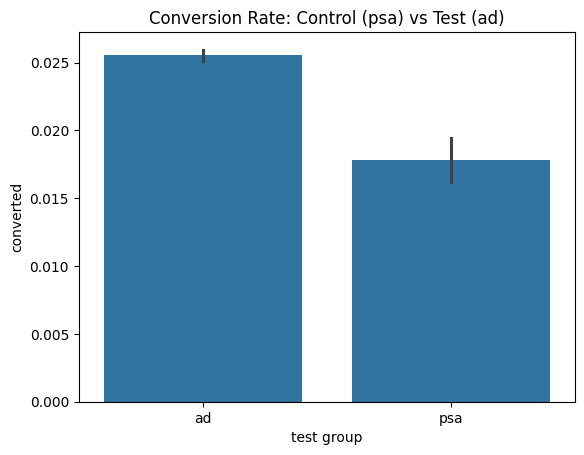

In [18]:
sns.barplot(x="test group", y="converted", data=df)
plt.title("Conversion Rate: Control (psa) vs Test (ad)")
plt.show()

In [19]:
summary = pd.DataFrame({
    "Group": ["Control (psa)", "Test (ad)"],
    "Conversion Rate": [control_rate, test_rate]
})

summary.to_csv("ab_test_summary.csv", index=False)
summary

,Group,Conversion Rate
0,Control (psa),0.017854
1,Test (ad),0.025547
